In [36]:
import pandas as pd
import numpy as np
df = pd.read_csv("../data/cleaned/final_merged_dataset.csv")
df.head()

,State,Crime_Type,Year,Cases,unemployment_rate,poverty_rate,per_capita_income,inflation_rate,population_density,gender_ratio,literacy_rate,youth_population_percent,urbanization_rate,human_development_index,police_stations_per_district,conviction_rate,police_personnel_per_100k,alcohol_consumption_per_capita
0,Andaman & Nicobar Islands,Burglary,2001,57,5.88,38.54,21691.8,4.4,10,915,61.94,24.0,22.0,0.535,6,37.0,59,2.3
1,Andaman & Nicobar Islands,Dacoity,2001,7,5.88,38.54,21691.8,4.4,10,915,61.94,24.0,22.0,0.535,6,37.0,59,2.3
2,Andaman & Nicobar Islands,Dowry Deaths,2001,0,5.88,38.54,21691.8,4.4,10,915,61.94,24.0,22.0,0.535,6,37.0,59,2.3
3,Andaman & Nicobar Islands,Kidnapping & Abduction,2001,33,5.88,38.54,21691.8,4.4,10,915,61.94,24.0,22.0,0.535,6,37.0,59,2.3
4,Andaman & Nicobar Islands,Murder,2001,10,5.88,38.54,21691.8,4.4,10,915,61.94,24.0,22.0,0.535,6,37.0,59,2.3


In [37]:
df.describe()

,Year,Cases,unemployment_rate,poverty_rate,per_capita_income,inflation_rate,population_density,gender_ratio,literacy_rate,youth_population_percent,urbanization_rate,human_development_index,police_stations_per_district,conviction_rate,police_personnel_per_100k,alcohol_consumption_per_capita
count,6930.000000,6930.000000,6930.000000,6930.000000,6930.000000,6930.000000,6930.000000,6930.000000,6930.000000,6930.000000,6930.000000,6930.000000,6930.000000,6930.000000,6930.000000,6930.000000
mean,2011.500000,2494.161760,5.897364,28.075610,48335.532675,4.983247,103.270130,901.533766,69.921675,25.178312,37.020779,0.652336,10.174026,36.987662,103.738961,2.669688
std,6.344747,8069.454875,0.994195,4.293755,39523.696963,1.419813,96.061581,27.151033,7.350325,2.948810,8.139293,0.054179,4.173605,6.252405,20.232866,0.560403
min,2001.000000,0.000000,2.800000,18.600000,5712.000000,2.000000,10.000000,850.000000,54.960000,16.580000,17.000000,0.484000,5.000000,22.100000,54.000000,1.170000
25%,2006.000000,31.000000,5.230000,24.980000,23480.140000,3.990000,11.000000,879.000000,64.190000,22.920000,30.400000,0.616000,7.000000,32.200000,89.000000,2.280000
50%,2011.500000,285.000000,5.955000,27.500000,38289.500000,5.035000,87.000000,904.000000,69.240000,25.650000,36.700000,0.654000,9.000000,37.600000,104.000000,2.650000
75%,2017.000000,1398.750000,6.590000,31.000000,66358.000000,5.950000,165.000000,923.000000,75.070000,27.580000,43.800000,0.691000,13.000000,41.700000,117.000000,3.070000
max,2022.000000,163119.000000,8.550000,39.230000,199643.430000,8.870000,408.000000,952.000000,84.520000,31.000000,54.400000,0.810000,19.000000,51.100000,166.000000,4.070000


In [38]:
numerical_cols = [
    'Year', 'unemployment_rate', 'poverty_rate', 'per_capita_income',
    'inflation_rate', 'population_density', 'gender_ratio', 'literacy_rate',
    'youth_population_percent', 'urbanization_rate', 'human_development_index',
    'police_stations_per_district', 'conviction_rate',
    'police_personnel_per_100k', 'alcohol_consumption_per_capita'
]

categorical_cols = ['State', 'Crime_Type']

In [39]:
target = 'Cases'

features = [
    'State', 'Crime_Type', 'Year', 'unemployment_rate', 'poverty_rate', 'per_capita_income',
    'inflation_rate', 'population_density', 'gender_ratio', 'literacy_rate',
    'youth_population_percent', 'urbanization_rate', 'human_development_index',
    'police_stations_per_district', 'conviction_rate', 'police_personnel_per_100k',
    'alcohol_consumption_per_capita'
]

X_raw = df[features]
y = df[target]

train_df = df[df['Year'] <= 2020]
test_df  = df[df['Year'] > 2020]

print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)

X_train_raw = train_df[features]
y_train = train_df[target]

X_test_raw = test_df[features]
y_test = test_df[target]

print("✅ Data successfully split")

Train shape: (6300, 18)
Test shape: (630, 18)
✅ Data successfully split


In [40]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

preprocessor = ColumnTransformer(
    transformers=[
        ('numerical', StandardScaler(), numerical_cols),
        ('categorical', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_cols)
    ]
)

X_train = preprocessor.fit_transform(train_df[categorical_cols + numerical_cols])
X_test  = preprocessor.transform(test_df[categorical_cols + numerical_cols])

print("One-Hot Encoding & Scaling Done!")
print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

One-Hot Encoding & Scaling Done!
Train shape: (6300, 59)
Test shape: (630, 59)


In [41]:
import joblib
import numpy as np
import pandas as pd
from math import sqrt
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [51]:
model = XGBRegressor(
    n_estimators=150,
    learning_rate=0.025,        
    max_depth=5,               
    subsample=0.9,
    colsample_bytree=0.95,
    reg_lambda=1.0,
    reg_alpha=0.2,
    min_child_weight=2,        
    gamma=0.1,                
    random_state=42,
    n_jobs=-1
)

model.fit(X_train, y_train)
y_pre = model.predict(X_train)
y_pred = model.predict(X_test)

print("Train Error : ")
print("R2:", r2_score(y_train, y_pre))
print("RMSE:", sqrt(mean_squared_error(y_train, y_pre)))
print("MAE:", mean_absolute_error(y_train, y_pre))
print()

print("Test Error : ")
print("R2:", r2_score(y_test, y_pred))
print("RMSE:", sqrt(mean_squared_error(y_test, y_pred)))
print("MAE:", mean_absolute_error(y_test, y_pred))

Train Error : 
R2: 0.8816769123077393
RMSE: 2809.041918519551
MAE: 901.9703979492188

Test Error : 
R2: 0.7809380292892456
RMSE: 3285.006849307928
MAE: 1050.02783203125


In [43]:
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

model = XGBRegressor(
    n_estimators=170,
    learning_rate=0.0250,
    max_depth=4,
    subsample=0.9,
    colsample_bytree=0.9,
    reg_lambda=1.2,
    reg_alpha=0.3,
    min_child_weight=3,
    gamma=0.4,
    random_state=42,
    n_jobs=-1
)

model.fit(X_train, y_train)

y_pre = model.predict(X_train)
y_pred = model.predict(X_test)

print("Train Performance:")
print("R2:", r2_score(y_train, y_pre))
print("RMSE:", sqrt(mean_squared_error(y_train, y_pre)))
print("MAE:", mean_absolute_error(y_train, y_pre))
print()

print("Test Performance:")
print("R2:", r2_score(y_test, y_pred))
print("RMSE:", sqrt(mean_squared_error(y_test, y_pred)))
print("MAE:", mean_absolute_error(y_test, y_pred))


Train Performance:
R2: 0.8165735602378845
RMSE: 3497.4736596577823
MAE: 1049.286376953125

Test Performance:
R2: 0.8044379353523254
RMSE: 3103.809916860245
MAE: 1010.3486328125


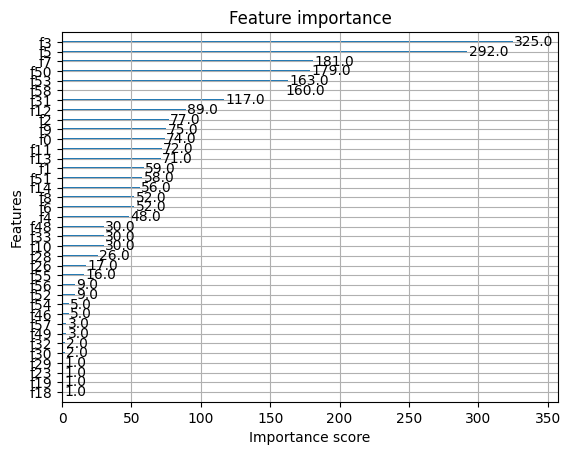

In [44]:
import matplotlib.pyplot as plt
import xgboost as xgb

xgb.plot_importance(model)
plt.show()


In [45]:
trees = model.get_booster().get_dump()
len(trees)

170

In [46]:
print(trees[0])

0:[f58<1] yes=1,no=2,missing=2
	1:[f3<0.534974694] yes=3,no=4,missing=4
		3:[f3<-0.409888059] yes=7,no=8,missing=8
			7:[f50<1] yes=15,no=16,missing=16
				15:leaf=-61.4018555
				16:leaf=-55.1174622
			8:[f50<1] yes=17,no=18,missing=18
				17:leaf=-44.741024
				18:leaf=35.0309601
		4:[f50<1] yes=9,no=10,missing=10
			9:[f53<1] yes=19,no=20,missing=20
				19:leaf=-34.2106133
				20:leaf=97.2535095
			10:[f5<0.840273082] yes=21,no=22,missing=22
				21:leaf=59.3047791
				22:leaf=131.525345
	2:[f5<0.00743604498] yes=5,no=6,missing=6
		5:[f3<-0.409888059] yes=11,no=12,missing=12
			11:[f48<1] yes=23,no=24,missing=24
				23:leaf=-32.7696609
				24:leaf=98.8806305
			12:[f28<1] yes=25,no=26,missing=26
				25:leaf=282.918579
				26:leaf=44.6009331
		6:[f3<0.62931025] yes=13,no=14,missing=14
			13:[f31<1] yes=27,no=28,missing=28
				27:leaf=348.525726
				28:leaf=915.763306
			14:[f2<-0.945998251] yes=29,no=30,missing=30
				29:leaf=1095.46753
				30:leaf=726.989075



In [47]:
import joblib

joblib.dump(model, "../model/xgb_model.pkl")

['../model/xgb_model.pkl']

In [48]:
# Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

lin_model = LinearRegression(n_jobs=-1)  # no random_state arg for LinearRegression
lin_model.fit(X_train, y_train)

y_pred_train_lin = lin_model.predict(X_train)
y_pred_test_lin  = lin_model.predict(X_test)

print("Linear Regression — Train Error :")
print("R2:", r2_score(y_train, y_pred_train_lin))
print("RMSE:", sqrt(mean_squared_error(y_train, y_pred_train_lin)))
print("MAE:", mean_absolute_error(y_train, y_pred_train_lin))
print()

print("Linear Regression — Test Error :")
print("R2:", r2_score(y_test, y_pred_test_lin))
print("RMSE:", sqrt(mean_squared_error(y_test, y_pred_test_lin)))
print("MAE:", mean_absolute_error(y_test, y_pred_test_lin))


Linear Regression — Train Error :
R2: 0.3766671962224568
RMSE: 6447.3831217408015
MAE: 2843.699587808547

Linear Regression — Test Error :
R2: 0.4489726757324236
RMSE: 5210.019558297462
MAE: 2751.4237207619317


In [49]:
# Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor(
    max_depth=4,           # tune this
    min_samples_split=8,   # tune this
    min_samples_leaf=4,    # tune this
    random_state=42
)

dt_model.fit(X_train, y_train)

y_pred_train_dt = dt_model.predict(X_train)
y_pred_test_dt  = dt_model.predict(X_test)

print("Decision Tree — Train Error :")
print("R2:", r2_score(y_train, y_pred_train_dt))
print("RMSE:", sqrt(mean_squared_error(y_train, y_pred_train_dt)))
print("MAE:", mean_absolute_error(y_train, y_pred_train_dt))
print()

print("Decision Tree — Test Error :")
print("R2:", r2_score(y_test, y_pred_test_dt))
print("RMSE:", sqrt(mean_squared_error(y_test, y_pred_test_dt)))
print("MAE:", mean_absolute_error(y_test, y_pred_test_dt))


Decision Tree — Train Error :
R2: 0.6547057171313762
RMSE: 4798.640116636786
MAE: 1317.6416303296796

Decision Tree — Test Error :
R2: 0.6690252216268557
RMSE: 4037.8505072823486
MAE: 1243.309863598366
